# Flight Fares


### Dataset Description

this dataset contains the information regarding flights of different airlines, including the price of the tickets, durations, destination, source city, etc. the focus in this Jupyter notebook file is on  the correlation between the flight tickets' prices and the other attributes and the goal is to make accurate predictions of the flight fares based these attributes.


Dataset Detail Information The dataset contains 300152 recrds in total. Every record has 10 features and 1 label which are described as below :
1- Airline
2- flight
3- Source_city
4- Departure
5- Stops
6- Arrival_Time
7- Destination
8- Class
9- Duration 
10- Days-left

Output Variable:
Price

There will be two different models implemented to make the predictions:

1- using polynomial regression model to predict the price of the tickets based on some of the other attributes with high correlation

2- Using an artificial neural network model to predict the price based on attributes with high correlation

In [14]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
import seaborn as sns

In [15]:
dataset = pd.read_csv('./FlightFaresDataset.csv')
dataset

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Since many of the attributes here are categorical and not numerical i use OrdinalEncoder to convert them into numerical values so the model can process them.

In [17]:
from sklearn.preprocessing import OrdinalEncoder

In [18]:
encoder = OrdinalEncoder()
encoder.fit(dataset[['airline']])
dataset['airline'] = encoder.transform(dataset[['airline']])
encoder.fit(dataset[['source_city']])
dataset['source_city'] = encoder.transform(dataset[['source_city']])
encoder.fit(dataset[['departure_time']])
dataset['departure_time'] = encoder.transform(dataset[['departure_time']])
encoder.fit(dataset[['stops']])
dataset['stops'] = encoder.transform(dataset[['stops']])
encoder.fit(dataset[['arrival_time']])
dataset['arrival_time'] = encoder.transform(dataset[['arrival_time']])
encoder.fit(dataset[['destination_city']])
dataset['destination_city'] = encoder.transform(dataset[['destination_city']])
encoder.fit(dataset[['class']])
dataset['class'] = encoder.transform(dataset[['class']])
dataset = dataset.drop('Unnamed: 0',axis=1)

In [19]:
dataset

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4.0,SG-8709,2.0,2.0,2.0,5.0,5.0,1.0,2.17,1,5953
1,4.0,SG-8157,2.0,1.0,2.0,4.0,5.0,1.0,2.33,1,5953
2,0.0,I5-764,2.0,1.0,2.0,1.0,5.0,1.0,2.17,1,5956
3,5.0,UK-995,2.0,4.0,2.0,0.0,5.0,1.0,2.25,1,5955
4,5.0,UK-963,2.0,4.0,2.0,4.0,5.0,1.0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5.0,UK-822,1.0,4.0,0.0,2.0,3.0,0.0,10.08,49,69265
300149,5.0,UK-826,1.0,0.0,0.0,5.0,3.0,0.0,10.42,49,77105
300150,5.0,UK-832,1.0,1.0,0.0,5.0,3.0,0.0,13.83,49,79099
300151,5.0,UK-828,1.0,1.0,0.0,2.0,3.0,0.0,10.00,49,81585


keep in mind that some attributes like the name of the flight do not have any contribution to the ticket's price so i dont transform them to numerical values and maybe even drop them later.

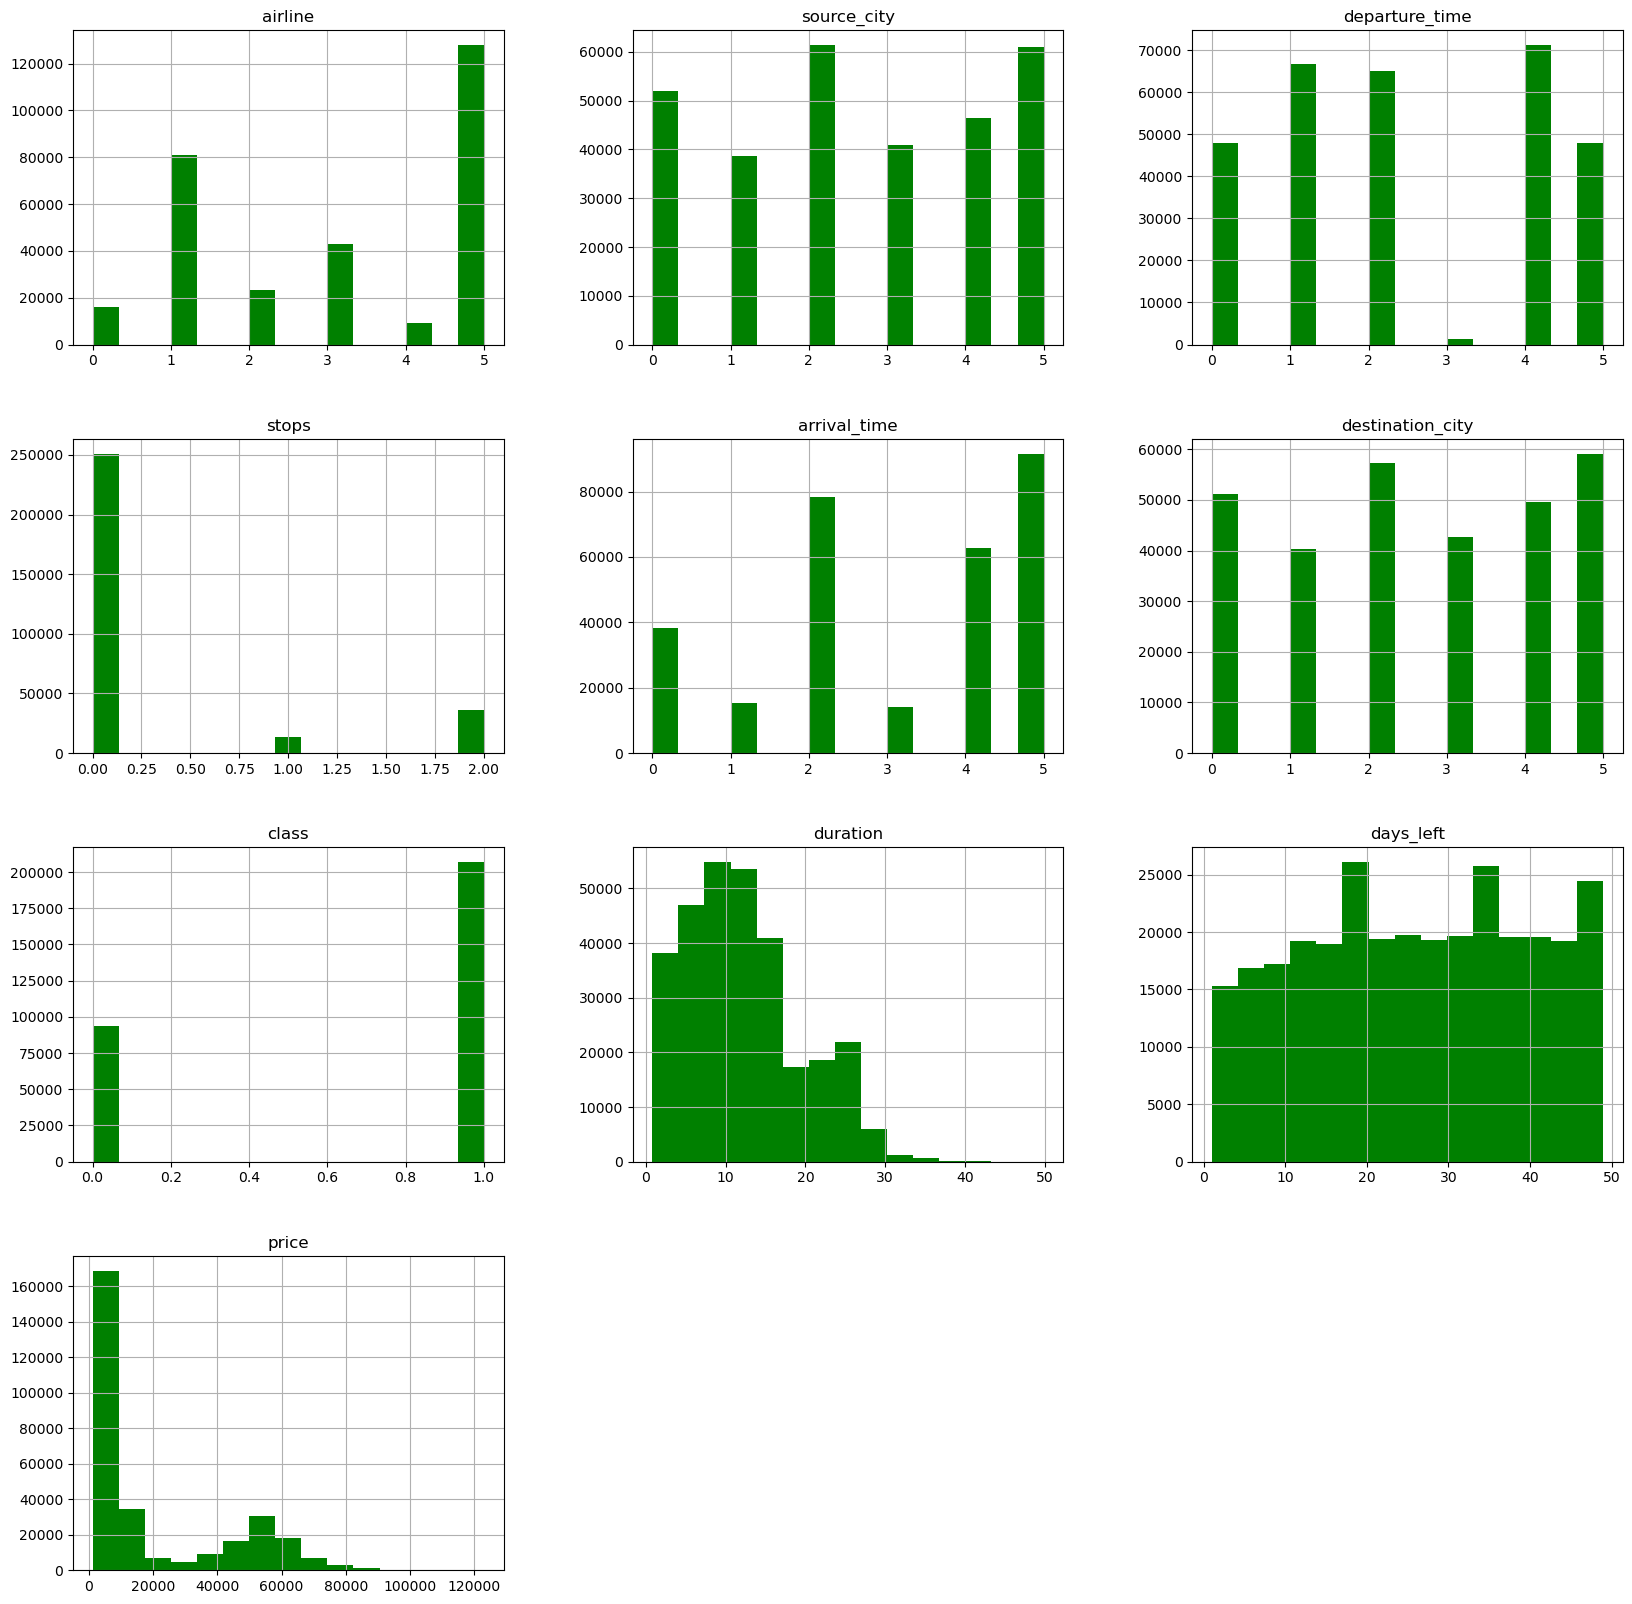

In [20]:
dataset.hist(bins=15 ,figsize=(20,20), color = 'Green')
plt.show()

based on the distribution of some of the attributes of this dataset i need to keep in mind to normalise the data before training my model, in order to achieve a better accuracy in evaluation process.

In [21]:
dataset = dataset.dropna(inplace = False)
dataset

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4.0,SG-8709,2.0,2.0,2.0,5.0,5.0,1.0,2.17,1,5953
1,4.0,SG-8157,2.0,1.0,2.0,4.0,5.0,1.0,2.33,1,5953
2,0.0,I5-764,2.0,1.0,2.0,1.0,5.0,1.0,2.17,1,5956
3,5.0,UK-995,2.0,4.0,2.0,0.0,5.0,1.0,2.25,1,5955
4,5.0,UK-963,2.0,4.0,2.0,4.0,5.0,1.0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5.0,UK-822,1.0,4.0,0.0,2.0,3.0,0.0,10.08,49,69265
300149,5.0,UK-826,1.0,0.0,0.0,5.0,3.0,0.0,10.42,49,77105
300150,5.0,UK-832,1.0,1.0,0.0,5.0,3.0,0.0,13.83,49,79099
300151,5.0,UK-828,1.0,1.0,0.0,2.0,3.0,0.0,10.00,49,81585


there's no missing value!

In [22]:
dataset.drop('flight', axis=1, inplace=True)


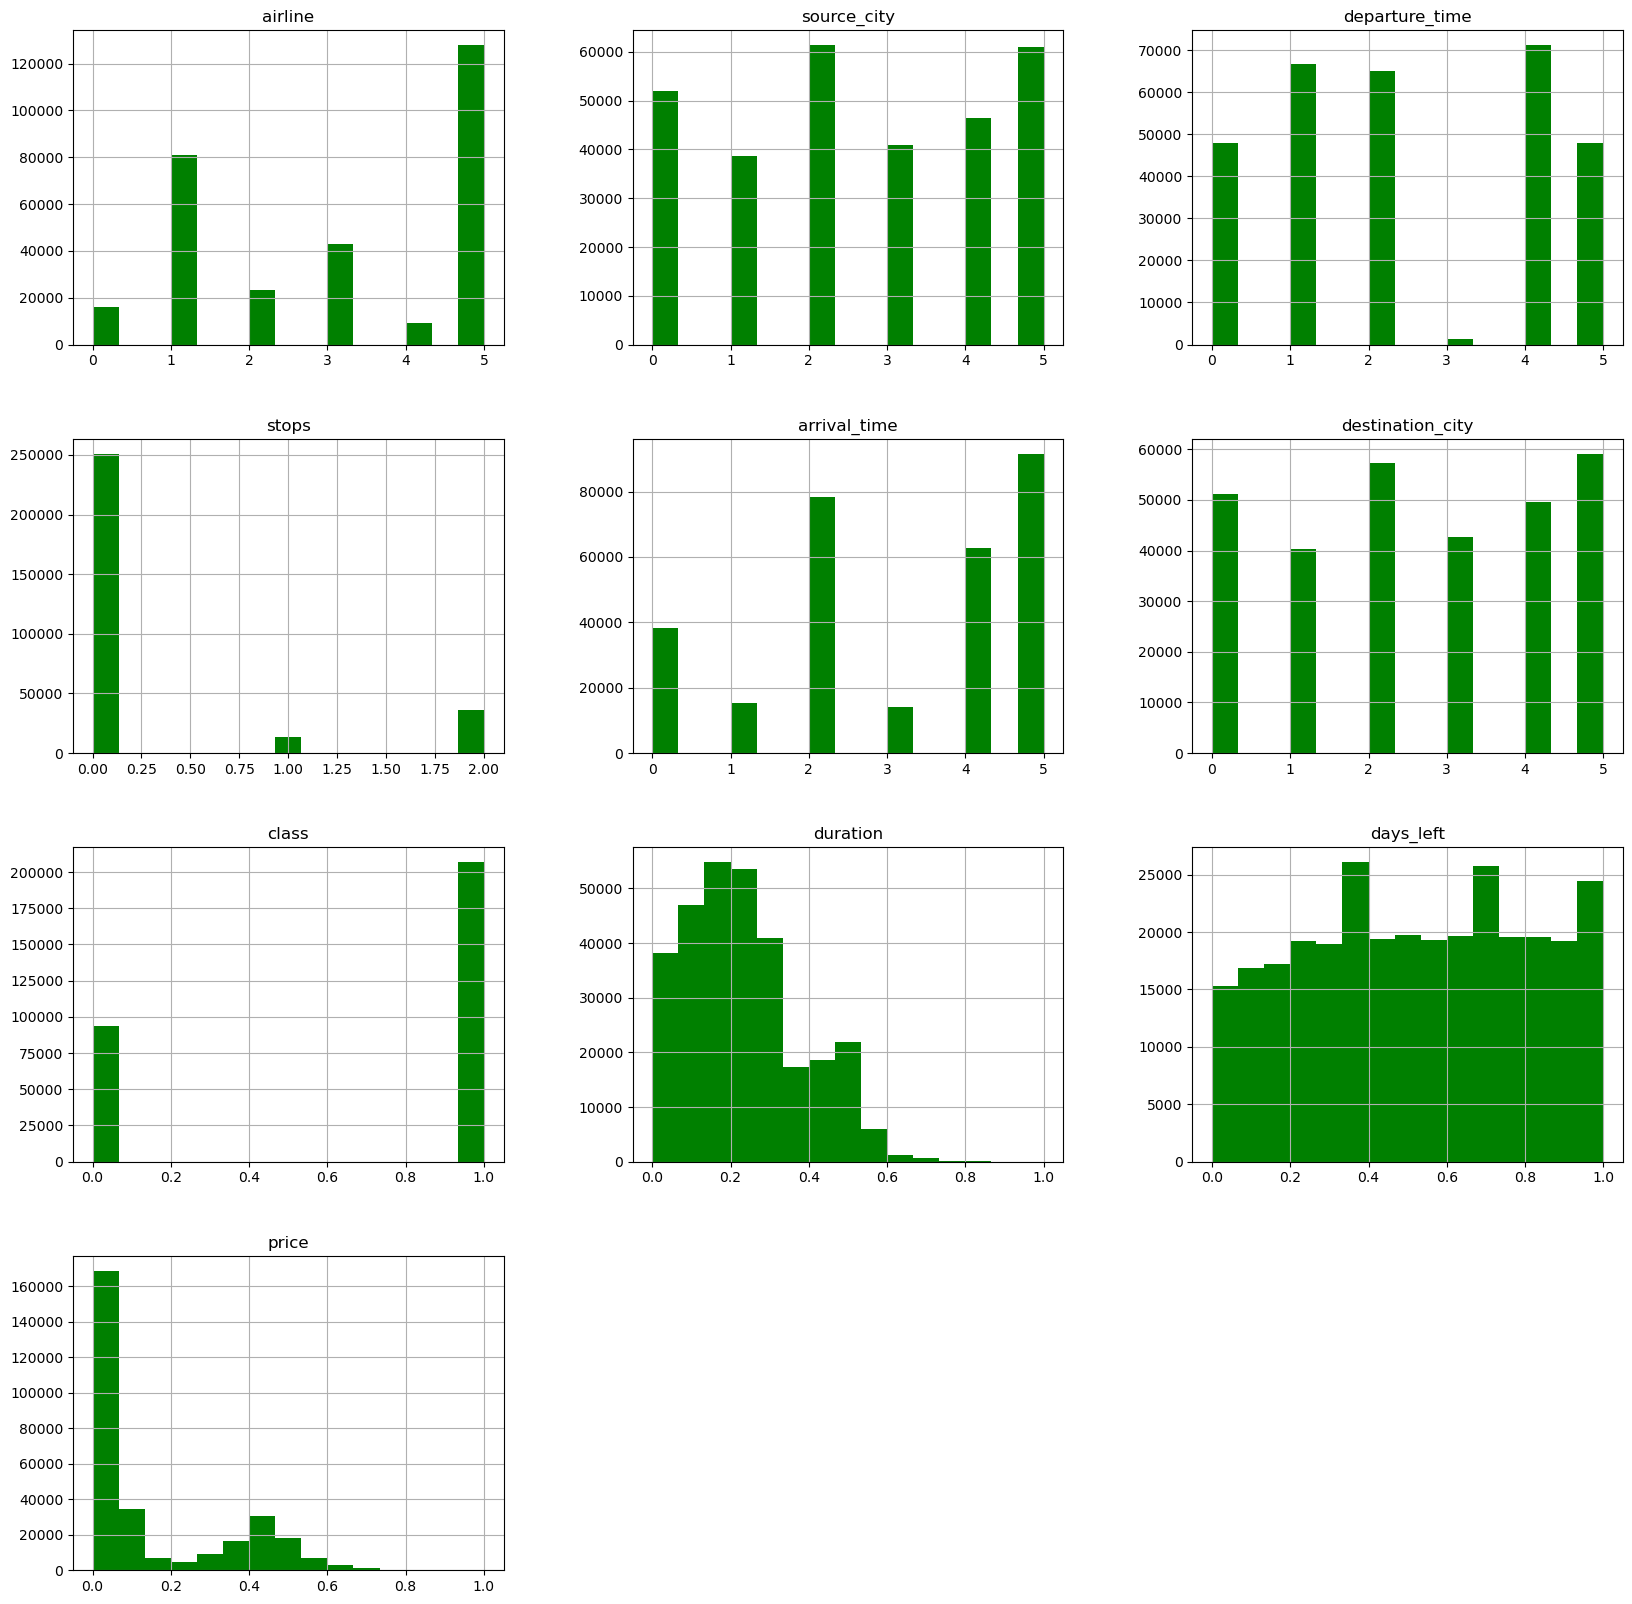

In [23]:
columns_to_normalize = ['duration', 'price', 'days_left']
scaler = MinMaxScaler()
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])
dataset.hist(bins=15 ,figsize=(20,20), color = 'Green')
plt.show()

I will plot the heatmap now to find out which attributes have the most correlation with the price of the tickets.

<Axes: >

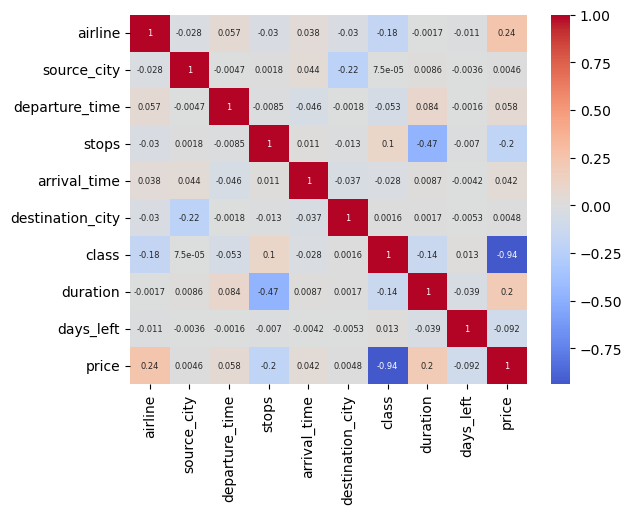

In [24]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, center=0,  annot_kws={"size": 6})

based on the heatmap it appears that the attributes Class, Stops and airline have the most noticable correlations so i will only use these three attributes to train my models.